Classification problem: MNIST data

The MNIST dataset is a widely used benchmark dataset in the field of machine learning and computer vision. It consists of a collection of 28x28 pixel grayscale images of handwritten digits (0-9), along with their corresponding labels indicating the digit they represent.

In [1]:
# Import necessary packages
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Splitting the dataset into training and testing
# Let's keep 90% of the data for training and 10% for testing
train_size = int(0.9 * len(x_train))
x_train, x_val = x_train[:train_size], x_train[train_size:]
y_train, y_val = y_train[:train_size], y_train[train_size:]

In [2]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(3, activation='relu'),    # Hidden layer with 3 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons for each digit class
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with 1 epoch
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_val, y_val));


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 312us/step - accuracy: 0.4390 - loss: 1.6039 - val_accuracy: 0.7093 - val_loss: 0.8757


Test Accuracy: 0.6721000075340271
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step


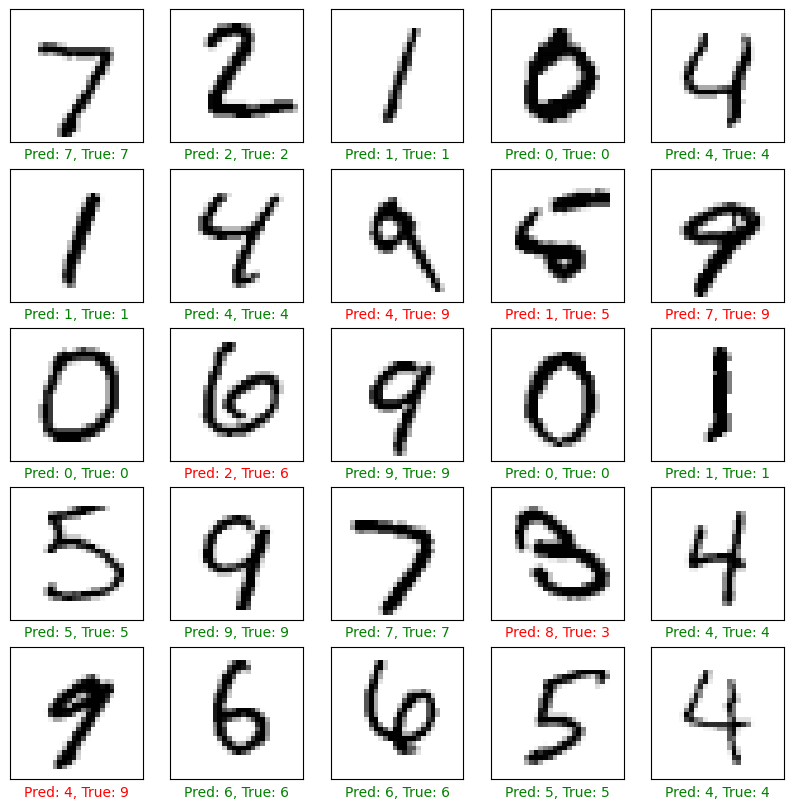

In [3]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Get predictions on the test set
predictions = model.predict(x_test)

# Visualize some test images along with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color=color)
plt.show()


By building the neural network model with 3 hidden neurons and training the modeled with 1 epoch, a terrible accuracy was obtained. In order to increase the accuracy, increasing the number of neurons in hidden layers and the number of epochs during training is necessary. 

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Splitting the dataset into training and testing
# Let's keep 90% of the data for training and 10% for testing
train_size = int(0.9 * len(x_train))
x_train, x_val = x_train[:train_size], x_train[train_size:]
y_train, y_val = y_train[:train_size], y_train[train_size:]


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(128, activation='relu'),    # Hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons for each digit class
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model with 10 epochs
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val));

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.8682 - loss: 0.4575 - val_accuracy: 0.9635 - val_loss: 0.1273
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.9609 - loss: 0.1278 - val_accuracy: 0.9712 - val_loss: 0.0983
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.9764 - loss: 0.0785 - val_accuracy: 0.9708 - val_loss: 0.0966
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.9813 - loss: 0.0617 - val_accuracy: 0.9733 - val_loss: 0.0962
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.9871 - loss: 0.0444 - val_accuracy: 0.9795 - val_loss: 0.0769
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - accuracy: 0.9897 - loss: 0.0345 - val_accuracy: 0.9763 - val_loss: 0.0886
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.9915 - loss: 0.0271 - val_accuracy: 0.9762 - val_loss: 0.0897
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.9938 - loss: 0.02

Test Accuracy: 0.978600025177002
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step


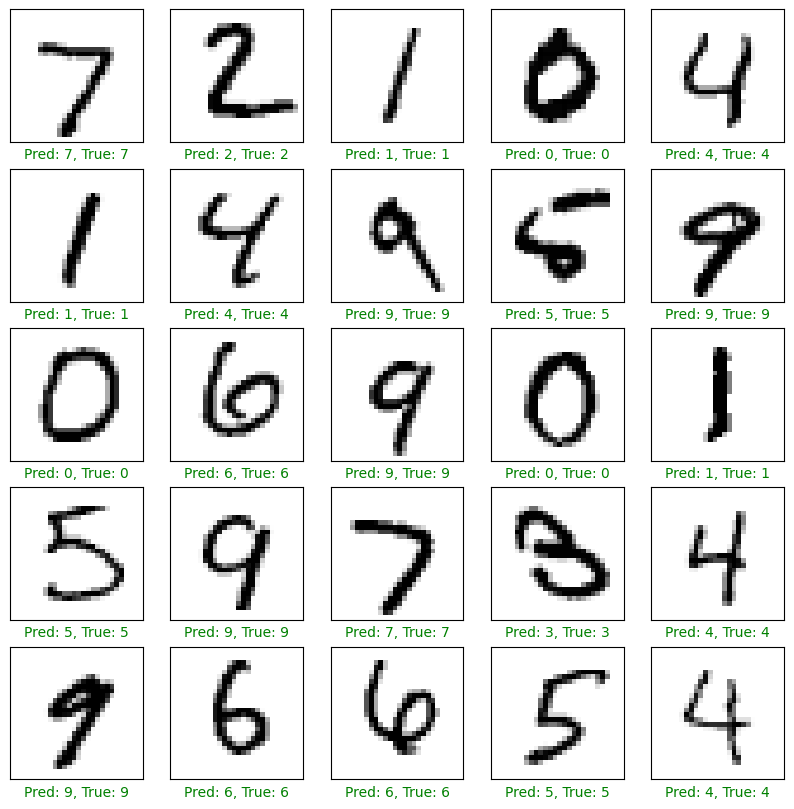

In [6]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Get predictions on the test set
predictions = model.predict(x_test)

# Visualize some test images along with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color=color)
plt.show()

1. Model Complexity:
- The first model with only 3 neurons in the hidden layer has lower model complexity compared to the second model with 128 neurons. This limited capacity may make it challenging for the first model to capture the complex patterns present in the MNIST dataset.

2. Underfitting:
- With only 3 neurons, the first model may suffer from underfitting, where the model is too simple to adequately learn the underlying patterns in the data. As a result, it may struggle to generalize well to unseen data, leading to lower accuracy.

3. Training Duration:
- The first model is trained with only 1 epoch, which means it is exposed to the training data for a very short duration. This limited training time may not be sufficient for the model to learn meaningful representations of the data, resulting in lower accuracy.

4. Overfitting Prevention:
- On the other hand, the second model with 128 neurons in the hidden layer and trained for 10 epochs has a higher capacity and is exposed to the training data for a longer duration. This allows it to learn more complex representations of the data and may help prevent overfitting, leading to higher accuracy.

5. Parameter Tuning:
- Hyperparameters such as the number of neurons in the hidden layer and the number of epochs are crucial for the performance of neural network models. The choice of these hyperparameters should be tuned carefully to achieve the best results.

In conclusion, the lower accuracy of the first neural network model compared to the second one can be attributed to its lower complexity, underfitting, limited training duration, and potentially inadequate hyperparameter settings.

